# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

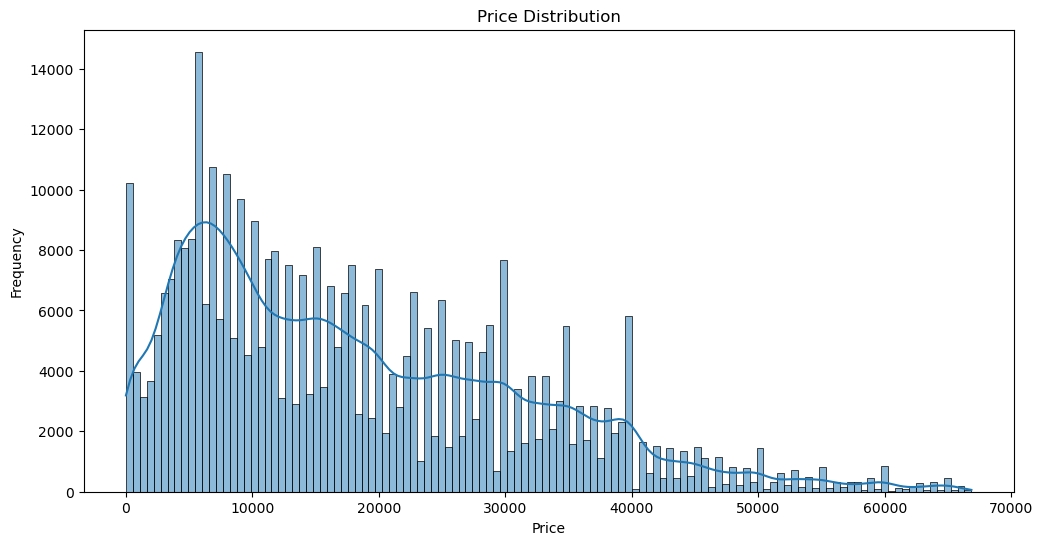

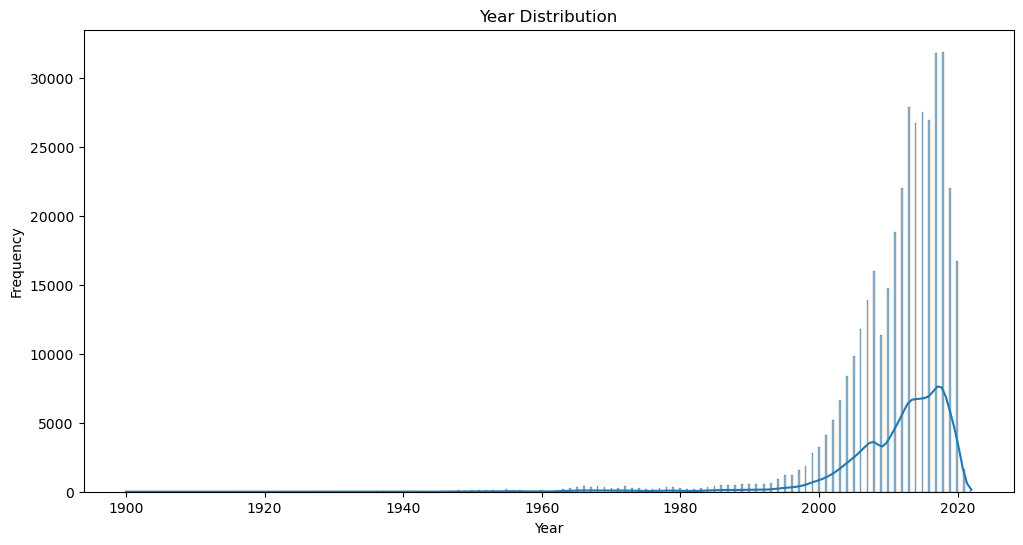

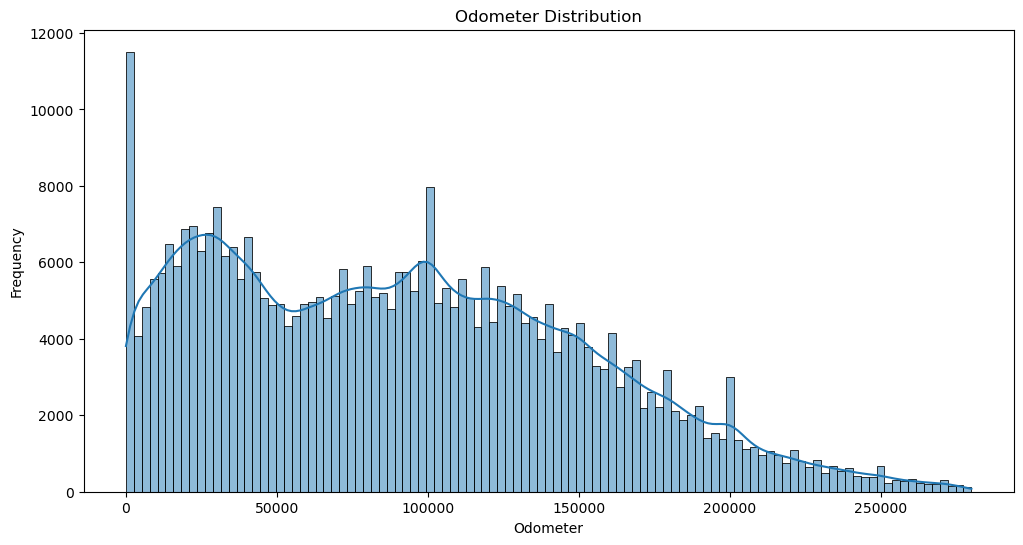

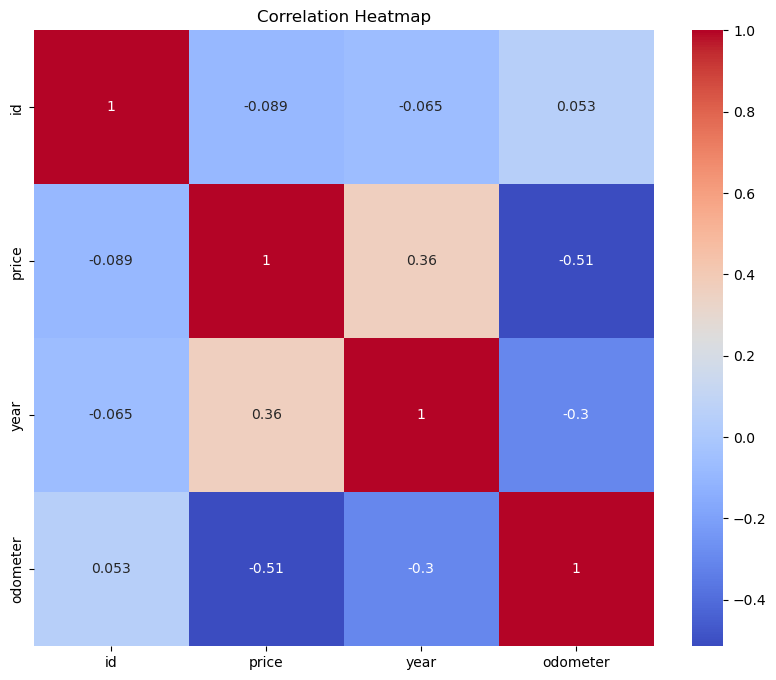

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
vehicles_data = pd.read_csv('data/vehicles.csv')

# Data Cleaning
# Handling missing values
vehicles_data.dropna(subset=['price', 'year', 'odometer'], inplace=True)

# Removing outliers
# For price, removing 0 and extremely high values
price_threshold = vehicles_data['price'].quantile(0.99)
vehicles_data = vehicles_data[(vehicles_data['price'] > 0) & (vehicles_data['price'] < price_threshold)]

# For odometer, removing extremely high values
odometer_threshold = vehicles_data['odometer'].quantile(0.99)
vehicles_data = vehicles_data[vehicles_data['odometer'] < odometer_threshold]

# Exploratory Data Analysis
# Analyzing distributions
plt.figure(figsize=(12, 6))
sns.histplot(vehicles_data['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(vehicles_data['year'], kde=True)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(vehicles_data['odometer'], kde=True)
plt.title('Odometer Distribution')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical columns only
numerical_cols = vehicles_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Load the dataset
    vehicles_data = pd.read_csv('data/vehicles.csv')  # Replace with your file path

    # Basic Data Inspection
    print("Basic Data Information:")
    print(vehicles_data.info())

    # Summary Statistics
    print("\nSummary Statistics:")
    print(vehicles_data.describe())

    # Null Value Analysis
    print("\nNull Value Analysis:")
    print(vehicles_data.isnull().sum())

    # Unique Value Analysis for categorical columns
    print("\nUnique Value Analysis for Categorical Columns:")
    for col in vehicles_data.select_dtypes(include='object').columns:
        print(f"{col}: {vehicles_data[col].nunique()} unique values")

    # Data Visualization
    # Price Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(vehicles_data['price'], kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    # Year Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(vehicles_data['year'].dropna(), kde=True)  # Drop NA for plotting
    plt.title('Year Distribution')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

    # Odometer Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(vehicles_data['odometer'].dropna(), kde=True)  # Drop NA for plotting
    plt.title('Odometer Distribution')
    plt.xlabel('Odometer')
    plt.ylabel('Frequency')
    plt.show()

if __name__ == "__main__":
    main()


Basic Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
vehicles_data = pd.read_csv('data/vehicles.csv')

# Feature Engineering
vehicles_data['car_age'] = 2023 - vehicles_data['year']  # Assuming current year is 2023

# Select columns for transformation
categorical_cols = vehicles_data.select_dtypes(include='object').columns
numerical_cols = vehicles_data.select_dtypes(include=['float64', 'int64']).drop(['price'], axis=1)

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Prepare data
X = preprocessor.fit_transform(vehicles_data.drop('price', axis=1))
y = vehicles_data['price']


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline



# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Create a Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Creating a pipeline with your preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random_forest_regressor)])

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting the Test set results
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
import joblib

# Save the model
joblib.dump(pipeline, 'vehicle_price_predictor.pkl')


In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('vehicle_price_predictor.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    # Assuming data is in the correct format
    prediction = model.predict([data])
    return jsonify({'prediction': list(prediction)})

if __name__ == '__main__':
    app.run(debug=True)
